In [7]:
from matplotlib.pyplot import cm

In [8]:
%run init.ipynb

In [9]:
files = [
    "./results/from_borg/hmc_0_10.pkl",
    "./results/from_borg/hmc_10_15.pkl",
    "./results/from_borg/hmc_15_20.pkl"]

In [10]:
idx = pd.IndexSlice

In [11]:
res = (pd
 .concat([pd.read_pickle(f) for f in files])
 .groupby(['option', 'no_betas', 'alpha'])
       .agg(['mean', 'std'])
       .drop(['seed', 'no_iters'], axis=1)
)
alphas = res.loc['alpha'].reset_index().alpha.unique()

In [12]:
def atoq(x):
    return (1 + x) / 2

In [13]:
def plot_bounds(res, error=True):
    mean1, var1 = -4.0, 3
    mean2, var2 = 4.0, 1
    
    alpha = res.loc['alpha'].reset_index()
    
    no_betass = alpha.no_betas.unique()
    alphas = alpha.alpha.unique()
    plt.figure(
        figsize=(8, 5),
        dpi=200)
    
    colors = sns.color_palette("bright", len(alphas)+1)
    markers = [".", "v", "^",  "s", "p", "P", "*", "+", "X", "D", "d", ".", "v", "^",  "s", "1", "3", "p", "P", "*", "+", "X", "D", "d"]
    moment_color = colors[0]
    
    plt.axhline(0, color="k", linewidth=2, label="truth")
    for idx, column in enumerate(['logZ_lower', "logZ_upper"]):
#         moment_mean_lb = moment[column]['mean'].values
#         moment_std_lb = moment[column]['std'].values
#         label = 'moment' if idx == 0 else None            
#         plt.plot(
#             no_betass,
#             moment_mean_lb,
#             "-.",
#             marker=markers[0],
#             color=moment_color,
#             label=label,
#         )

#         if error:
#             plt.fill_between(
#                 no_betass,
#                 moment_mean_lb + 3*moment_std_lb,
#                 moment_mean_lb - 3*moment_std_lb,
#                 color=moment_color,
#                 alpha=0.2
#             )

        for i, a in enumerate(alphas):
            alpha_mean_lb = alpha[alpha.alpha == a][column]['mean'].values
            alpha_std_lb = alpha[alpha.alpha == a][column]['std'].values

            if a == -1:
                label = r"$q = {:.2f}$ (mixture)".format(atoq(a))
            elif a == 1:
                label = r"$q = {:.2f}$ (geometric)".format(atoq(a))
            else:
                label = r"$q = {:.2f}$".format(atoq(a))

            if idx == 1:
                label = None

            plt.plot(
                no_betass,
                alpha_mean_lb,
                color=colors[i+1],
                marker=markers[i+1],
                label=label,
            )
            if error:
                plt.fill_between(
                    no_betass,
                    alpha_mean_lb + 3*alpha_std_lb,
                    alpha_mean_lb - 3*alpha_std_lb,
                    color=colors[i+1],
                    alpha=0.2,
                )

    plt.xlabel("T", fontsize=22)
    plt.ylabel(r"$\log\mathcal{Z}_T/\mathcal{Z}_0$", fontsize=22)
    plt.xscale("log")
    plt.legend(ncol=2, fontsize=14)
#     plt.title(
#         r"$N({:.2f},{:.2f}) \rightarrow N({:.2f},{:.2f})$".format(
#             mean1, var1, mean2, var2
#         ),
#         fontsize=22
#     )
    ax = plt.gca()
    ax.set_xticks([3, 5, 10, 100])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
#     ax.set_yticks([-20, -15, -10, 5, 0, 5])
#     ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    sns.despine(trim=True)
    plt.tight_layout()
    plt.savefig("/Users/vmasrani/dev/phd/projects/local/alpha_path/5f6509b697c4c50001b622a1/sections/figs/logz_est_alpha_path.pdf")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/vmasrani/dev/phd/projects/local/alpha_path/5f6509b697c4c50001b622a1/sections/figs/logz_est_alpha_path.pdf'

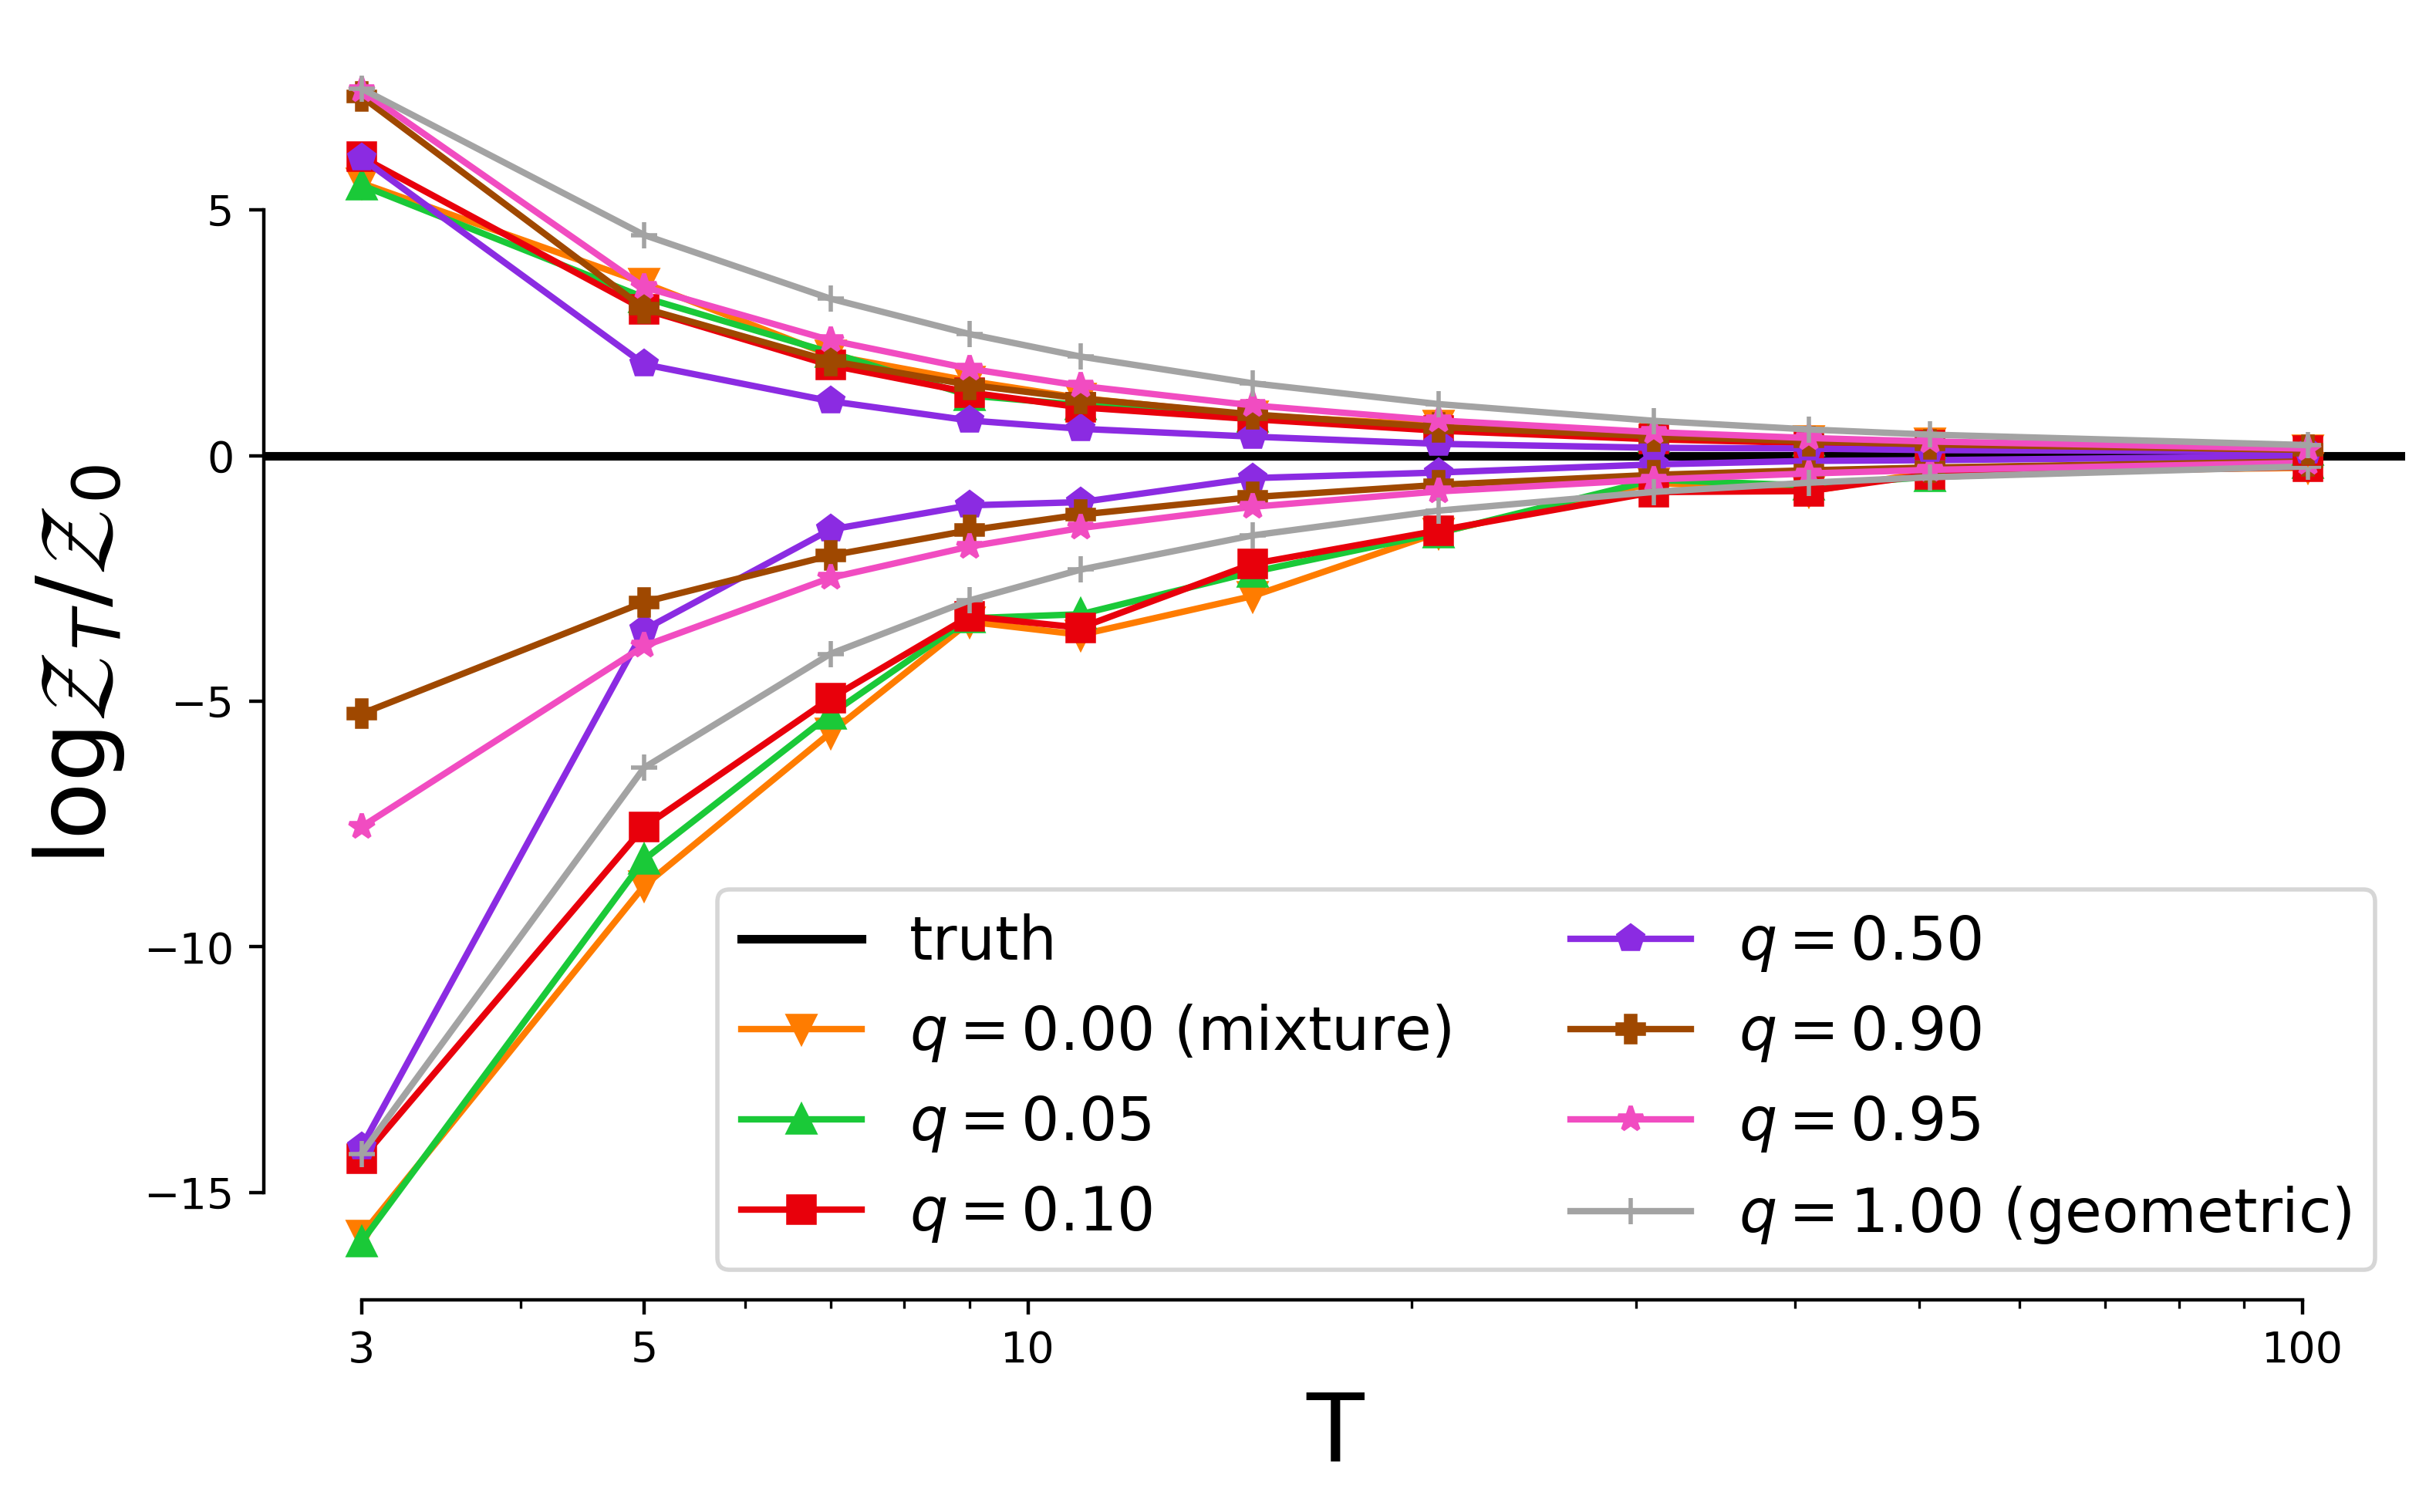

In [14]:
plot_bounds(res.loc[idx[:, :, alphas[[0, 1, 2, 10, -3, -2, -1]]]], 
            error=False)
# plot_bounds(res.loc[idx[:, :, alphas[[0, 2, 10, -3, -1]]]], 
#             error=True)